<a href="https://colab.research.google.com/github/RussoT99/ProyectoDS_ParteI/blob/main/ProyectoDS_Parte_I__Russo_Tom%C3%A1s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de calidad en vinos

- El análisis de la calidad del vino es un área de interés tanto para productores como para consumidores, ya que permite identificar los factores que más influyen en la percepción de calidad y, por lo tanto, en el valor comercial del producto.  Este estudio se enfoca en el análisis de un dataset de vinos tintos con el objetivo de identificar las relaciones entre las propiedades fisicoquímicas del vino y su calidad, evaluada en una escala de 0 a 10 por expertos. El dataset incluye 1599 observaciones y 12 variables que describen características como la acidez fija y volátil, el contenido de alcohol, la cantidad de azúcar residual, entre otras.



- El análisis exploratorio inicial sugiere que algunas propiedades, como el pH, el contenido de alcohol y los niveles de dióxido de azufre, podrían estar correlacionadas con la calificación de calidad del vino. Este estudio buscará profundizar en estas relaciones utilizando técnicas de análisis estadístico y machine learning, con el objetivo de desarrollar un modelo predictivo que permita estimar la calidad del vino a partir de sus características fisicoquímicas.

# Preguntas de Investigación

- ¿Cuáles son las variables fisicoquímicas que más influyen en la calidad del vino según las calificaciones proporcionadas?
- ¿Existe una correlación significativa entre el contenido de alcohol y la calidad del vino?
- ¿Cómo afecta la combinación de diferentes niveles de acidez (fija y volátil) a la percepción de calidad del vino?
- Qué rol juegan los niveles de dióxido de azufre (libre y total) en la calidad del vino?
- ¿Es posible predecir la calidad del vino utilizando un modelo de machine learning basado en las variables disponibles?

# Hipótesis

- Hipótesis 1: Existe una correlación positiva significativa entre el contenido de alcohol y la calidad del vino.
- Hipótesis 2: Las variables de acidez fija y volátil combinadas tienen un efecto significativo en la calificación de calidad del vino.
- Hipótesis 3: Un mayor nivel de dióxido de azufre total está asociado con una menor calificación de calidad del vino.
- Hipótesis 4: Un modelo de regresión lineal o un algoritmo de machine learning puede predecir con precisión la calidad del vino a partir de las propiedades fisicoquímicas medidas.

# Dependencias.

In [7]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import  numpy as np

# Data Acquisition

In [8]:
file_path = 'https://raw.githubusercontent.com/RussoT99/ProyectoDS_ParteI/main/winequality-red.csv'

df = pd.read_csv(file_path)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Descripción de las variables

**Datos**

*  **fixed acidity:** La cantidad de ácidos no volátiles en el vino. Se mide en gramos por litro (g/L).

*  **volatile acidity:** Se refiere a la cantidad de ácidos volátiles en el vino. Un nivel alto puede indicar problemas en la fermentación. Se mide en gramos por litro (g/L).

*  **citric acid:**  Representa la cantidad de ácido cítrico. Se mide en gramos por litro (g/L).

*  **residual sugar:** Es la cantidad de azúcar que queda en el vino después de la fermentación. Se mide en gramos por litro (g/L).

*  **chlorides:** La cantidad de cloruro en el vino. Se mide en gramos por litro (g/L).

*  **free sulfur dioxide:** El dióxido de azufre libre, que actúa como conservante. Se mide en miligramos por litro (mg/L).

*  **total sulfur dioxide:** La suma de todo el dióxido de azufre presente en el vino, tanto en forma libre como combinada. Se mide en miligramos por litro (mg/L).

*  **density:** La densidad del vino, que puede estar influenciada por el contenido de alcohol y azúcar. Se expresa en g/cm³.

*  **pH:** Mide la acidez o alcalinidad del vino en una escala de 0 a 14. Siendo 0 muy acido y 14 muy básico o alcalino.

*  **sulphates:**  La cantidad de sulfatos en el vino. Se mide en gramos por litro (g/L).

*  **alcohol:** El porcentaje de alcohol en el vino. Es la graduación alcoholica de la bebida.

*  **quality:**  La calificación de calidad del vino, usualmente en una escala de 0 a 10, basada en evaluaciones sensoriales.





# Estadística Descriptiva

In [ ]:
df.shape

(1599, 12)

In [ ]:
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  TSD_z                 1599 non-null   float64
 13  TSD_outliers          1599 non-null   int64  
dtypes: float64(12), int64(2)
memory usage: 175.0 KB


In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df.describe().round(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.3,0.5,0.3,2.5,0.1,15.9,46.5,1.0,3.3,0.7,10.4,5.6
std,1.7,0.2,0.2,1.4,0.0,10.5,32.9,0.0,0.2,0.2,1.1,0.8
min,4.6,0.1,0.0,0.9,0.0,1.0,6.0,1.0,2.7,0.3,8.4,3.0
25%,7.1,0.4,0.1,1.9,0.1,7.0,22.0,1.0,3.2,0.6,9.5,5.0
50%,7.9,0.5,0.3,2.2,0.1,14.0,38.0,1.0,3.3,0.6,10.2,6.0
75%,9.2,0.6,0.4,2.6,0.1,21.0,62.0,1.0,3.4,0.7,11.1,6.0
max,15.9,1.6,1.0,15.5,0.6,72.0,289.0,1.0,4.0,2.0,14.9,8.0


In [ ]:
cardinalidad = pd.DataFrame({'Cantidad' : df.nunique(), 'Porcentaje' : (df.nunique())/(df.shape[0])*(100)})
cardinalidad

,Cantidad,Porcentaje
fixed acidity,96,6.003752
volatile acidity,143,8.943089
citric acid,80,5.003127
residual sugar,91,5.691057
chlorides,153,9.568480
free sulfur dioxide,60,3.752345
total sulfur dioxide,144,9.005629
density,436,27.267042
pH,89,5.565979
sulphates,96,6.003752


In [ ]:
df['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [ ]:
# Analisis de Outliers: Variable objetivo pH --> float


# Calculamos el z-score
df['pH_z'] = (df['pH'] - df['pH'].mean())/df['pH'].std()
# Creamos una variable para marcar los outliers
df['pH_outliers'] = 0
# Usamos una condicion para marcar los outliers
# tienen que tener un z-score > 3 o <-3
df.loc[(df['pH_z']>3)|(df['pH_z']<-3) , 'pH_outliers'] = 1
# Veamos los resultados
df[['pH', 'pH_z','pH_outliers']]

,pH,pH_z,pH_outliers
0,3.51,1.288240,0
1,3.20,-0.719708,0
2,3.26,-0.331073,0
3,3.16,-0.978798,0
4,3.51,1.288240,0
...,...,...,...
1594,3.45,0.899605,0
1595,3.52,1.353012,0
1596,3.42,0.705287,0
1597,3.57,1.676875,0


In [ ]:
# Veamos los casos marcados
df['pH_outliers'].value_counts()

,count
pH_outliers,
0,1591
1,8


In [ ]:
# Se traen los valores puntuales donde se consideraron los outliers.
df['pH'][df['pH_outliers']==1]

,pH
45,3.90
95,3.85
151,2.74
695,3.90
1111,3.78
1300,3.78
1316,4.01
1321,4.01


# Visualizaciones y Gráficos

# ACIDEZ

<Axes: xlabel='quality', ylabel='fixed acidity'>

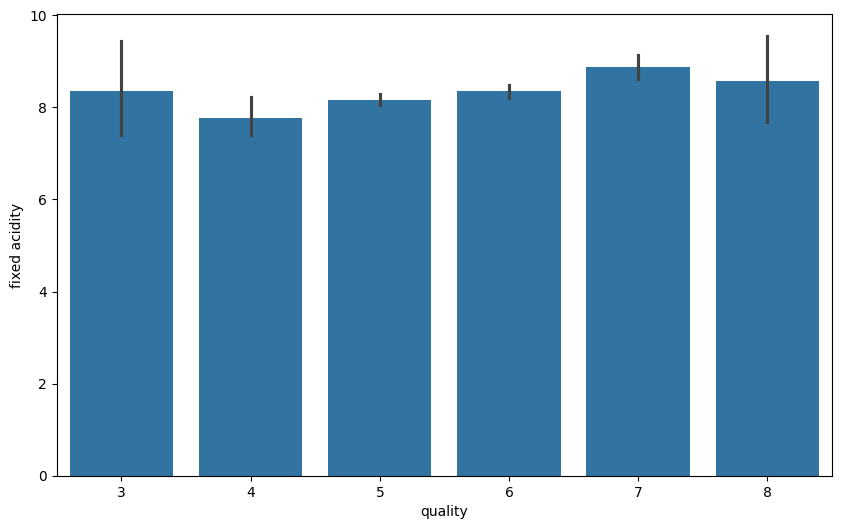

In [5]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

# Aquí se puede observar que la acidez no da ninguna especificación para clasificar la calidad.

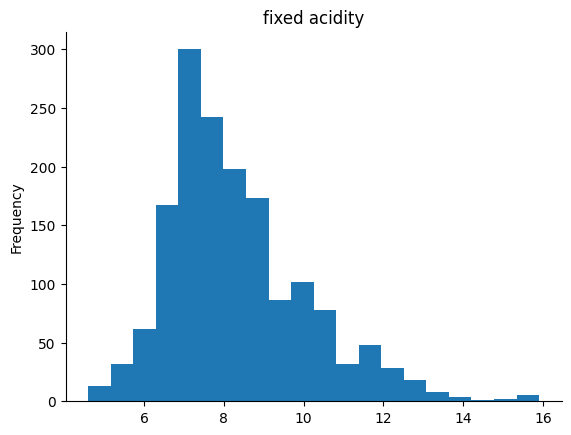

In [ ]:
df['fixed acidity'].plot(kind='hist', bins=20, title='fixed acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

# En este gráfico se puede ver que la acidez pareciera tener una distribución normal y que la mayoria de los valores ronda entre 6 y 10 g/L

<Axes: xlabel='quality', ylabel='volatile acidity'>

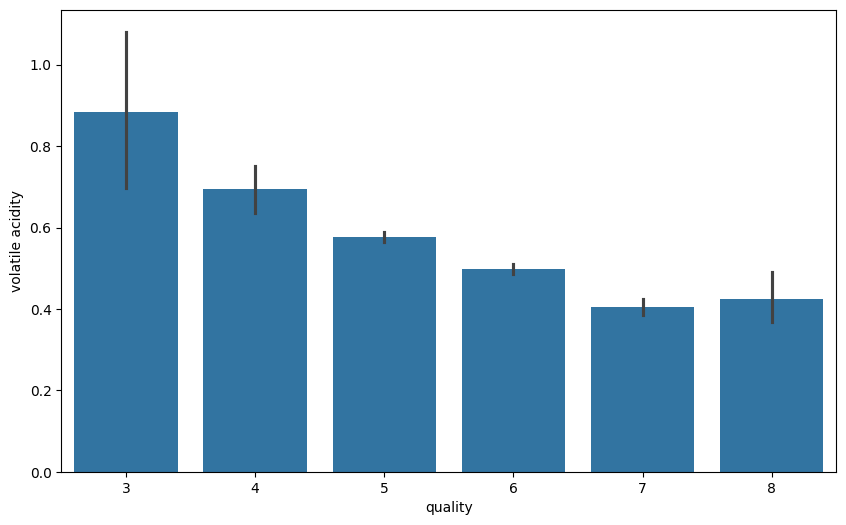

In [6]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

# Aquí se puede ver que es una tendencia bastante a la baja en la acidez volátil a medida que subimos la calidad

<Axes: xlabel='quality', ylabel='citric acid'>

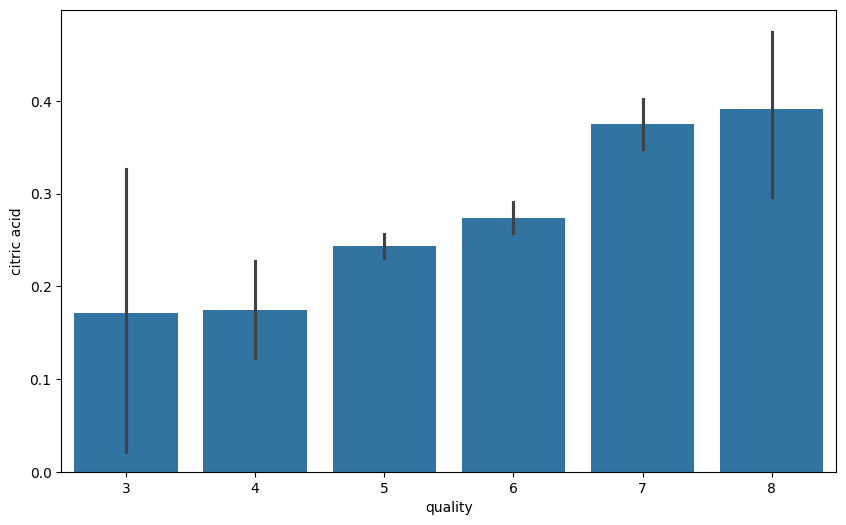

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

# La composición del ácido cítrico aumenta a medida que aumenta la calidad del vino

# AZUCAR RESIDUAL

<Axes: xlabel='quality', ylabel='residual sugar'>

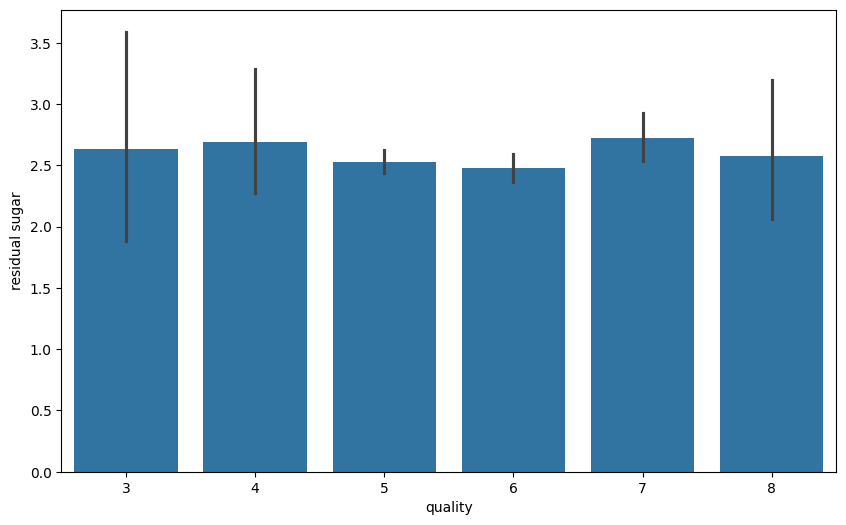

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

# La cantidad de azúcar residual no varia ni influye en la calidad del vino

# CLORUROS

<Axes: xlabel='quality', ylabel='chlorides'>

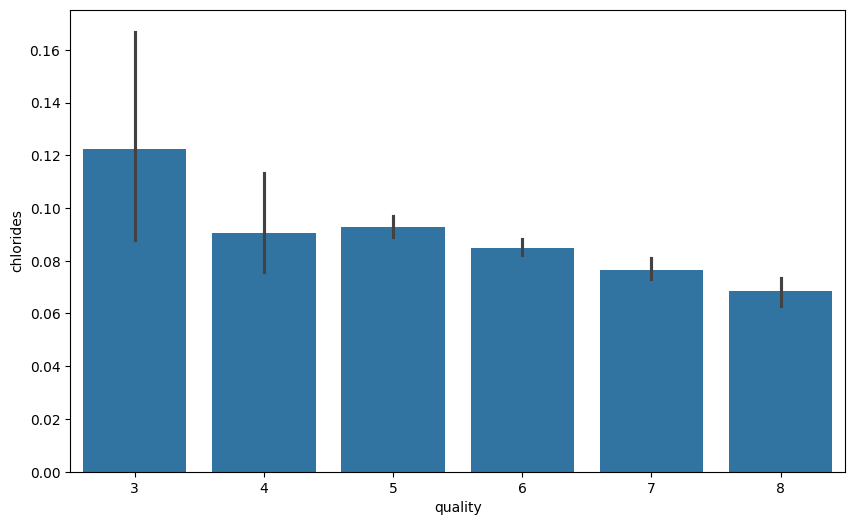

In [18]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

# La cantidad de cloruro es menor a medida que aumenta la calidad del vino

# SULFATOS

<Axes: xlabel='quality', ylabel='sulphates'>

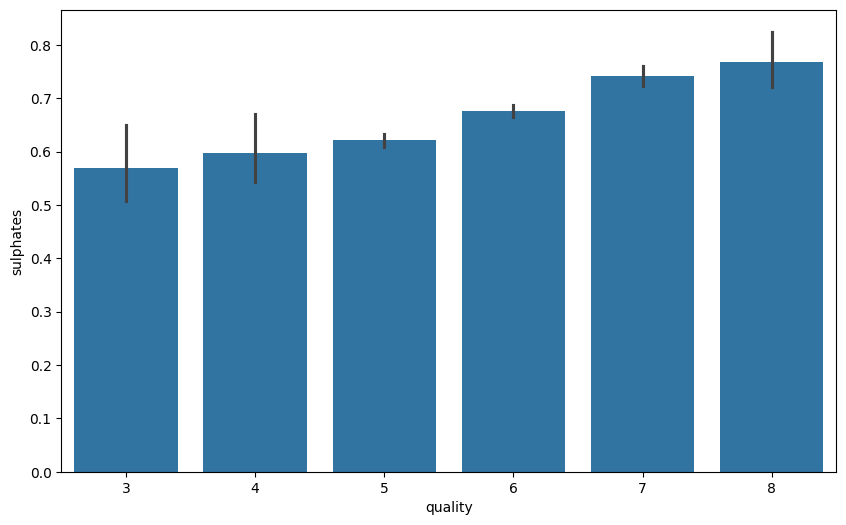

In [20]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

# La cantidad de sulfatos aumenta a medida que aumenta la calidad del vino

Correlación entre dióxido de azufre total y calidad: -0.19


<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

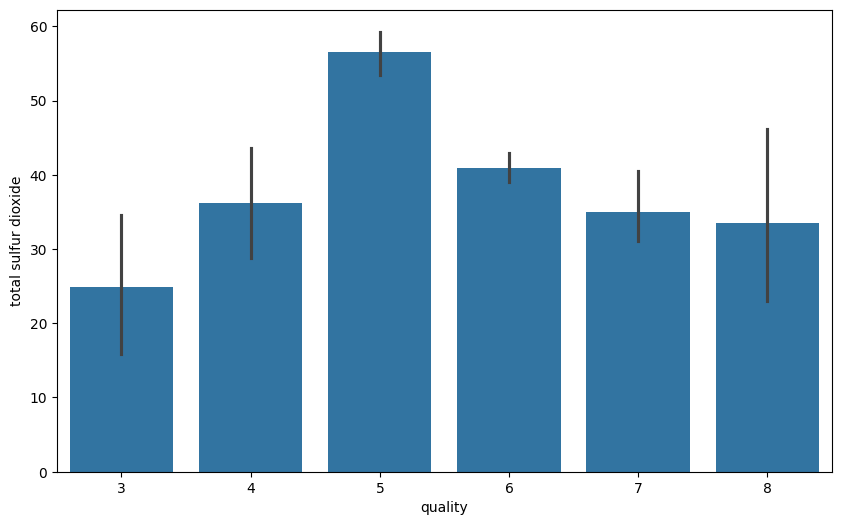

In [26]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)


In [30]:
# Calculamos la correlación entre 'total sulfur dioxide' y 'quality'
correlation_sulfur_quality = df['total sulfur dioxide'].corr(df['quality'])
print(f"Correlación entre dióxido de azufre total y calidad: {correlation_sulfur_quality:.2f}")

Correlación entre dióxido de azufre total y calidad: -0.19


La correlación negativa débil (-0.19) sugiere que casi no existe tendencia a que vinos con mayor contenido de dióxido de azufre total tengan una calidad ligeramente menor.



# ALCOHOL

<Axes: xlabel='quality', ylabel='alcohol'>

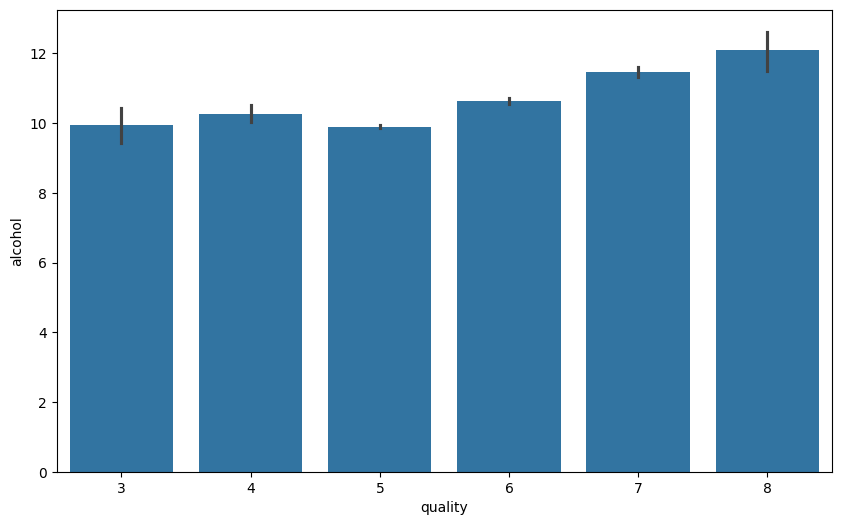

In [29]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

# El porcentaje de alcohol aumenta a medida que aumenta la calidad del vino

In [24]:
# Calculamos la correlación entre 'alcohol' y 'quality'
correlation_alcohol_quality = df['alcohol'].corr(df['quality'])
print(f"Correlación entre alcohol y calidad: {correlation_alcohol_quality:.2f}")

Correlación entre alcohol y calidad: 0.48


La correlación positiva moderada (0.48) y el gráfico  sugieren que a medida que aumenta el contenido de alcohol, tiende a aumentar la calidad percibida del vino.

# CALIDAD

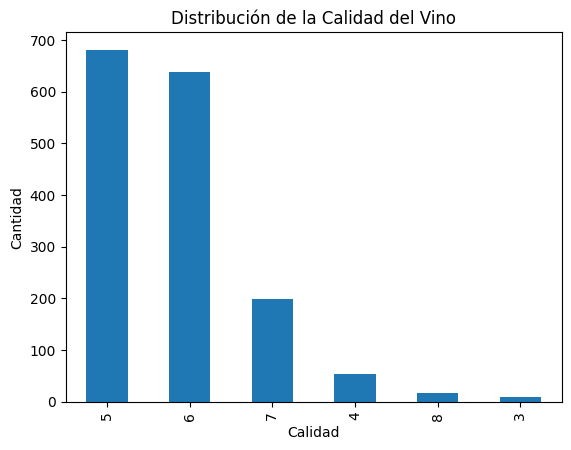

In [11]:
# Análisis de la variable objetivo (calidad)
df['quality'].value_counts().plot(kind='bar')
plt.xlabel('Calidad')
plt.ylabel('Cantidad')
plt.title('Distribución de la Calidad del Vino')
plt.show()

# HISTOGRAMAS

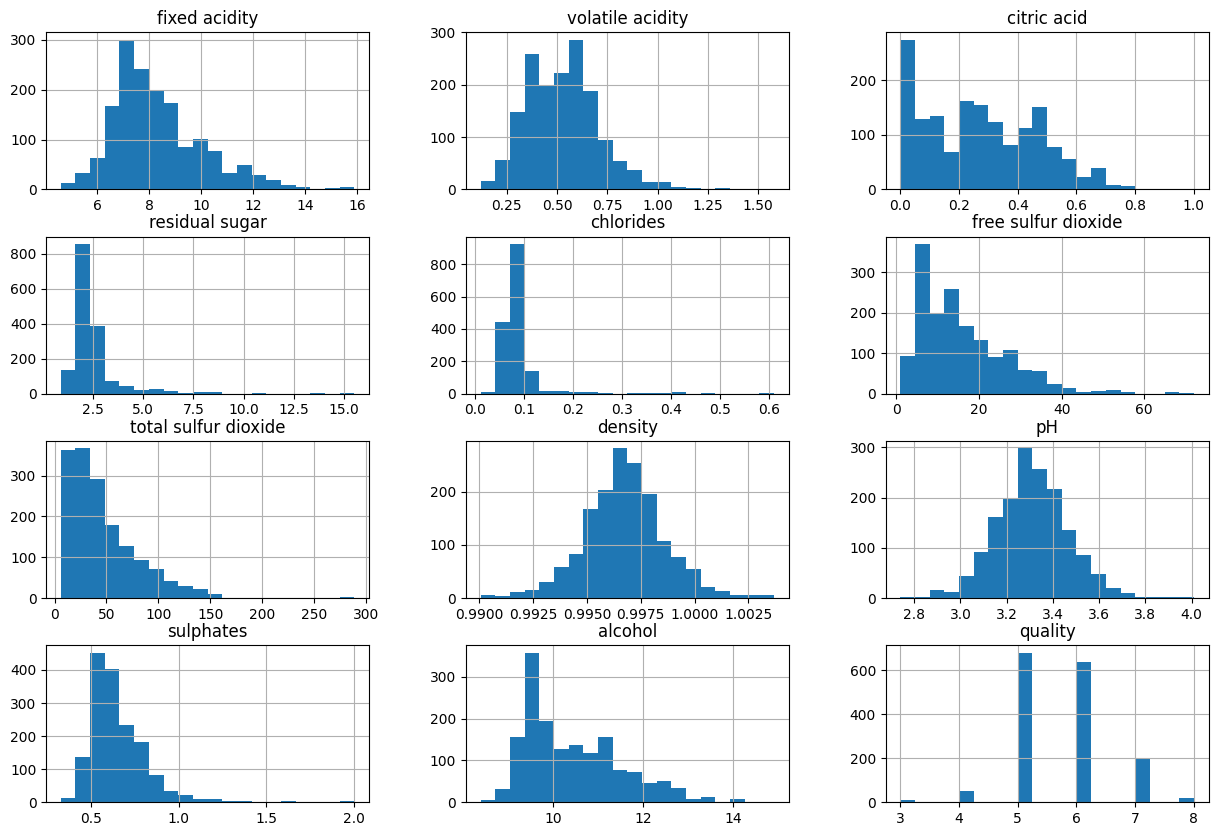

In [ ]:
# Histogramas para cada variable
df.hist(bins=20, figsize=(15, 10))
plt.show()

Podemos observar que algunas variables como la densidad y el pH tienen una distribución y comportamiento normal

# BOX PLOTS

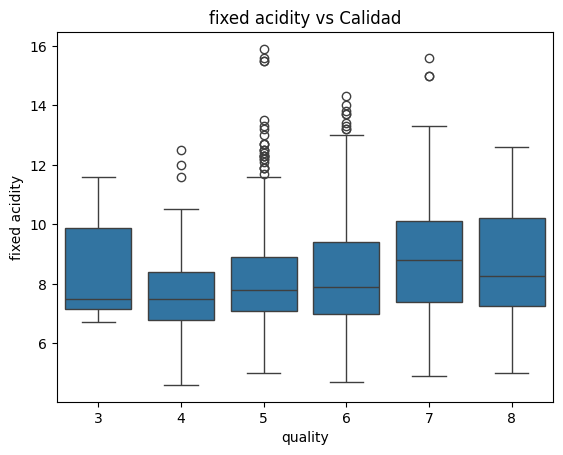

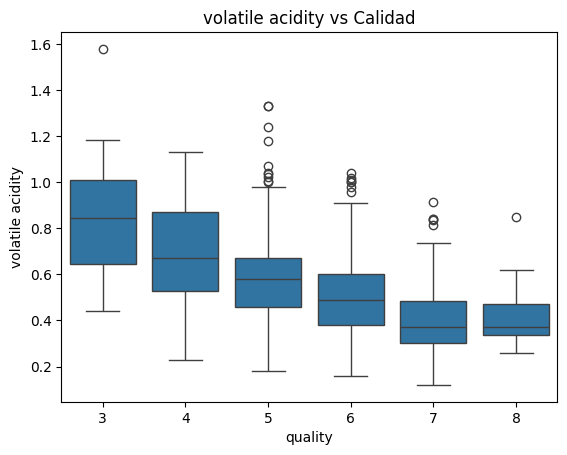

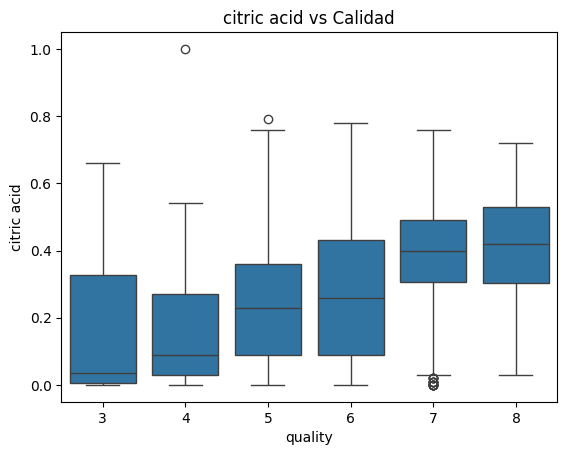

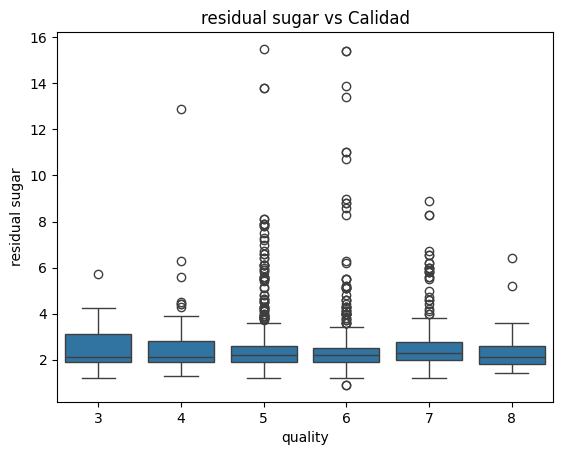

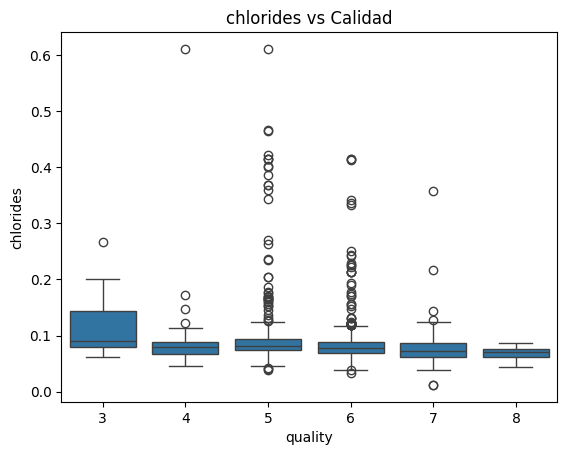

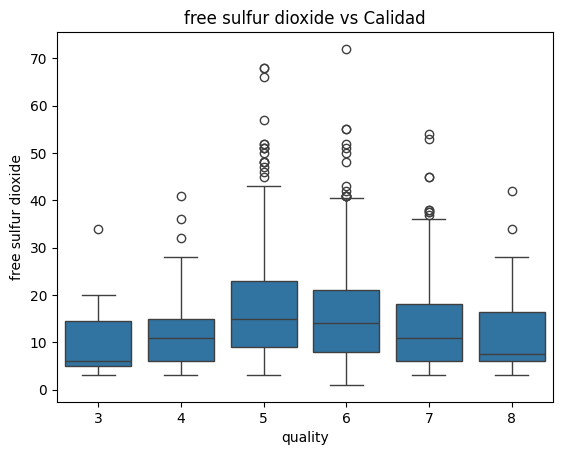

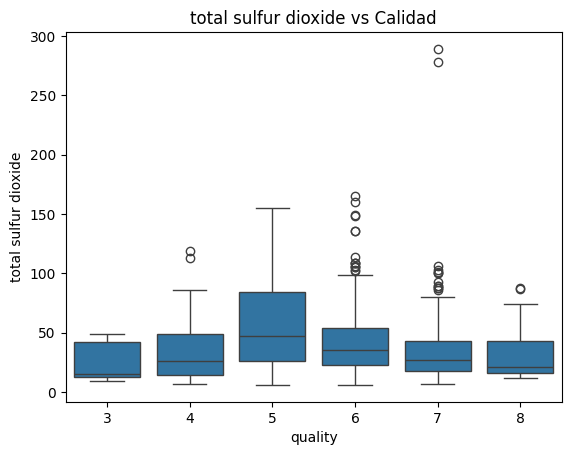

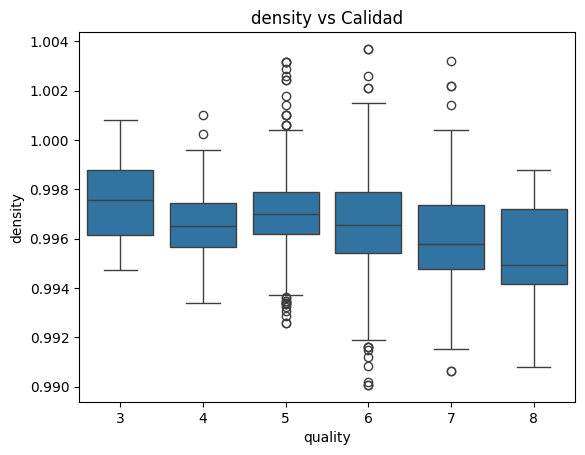

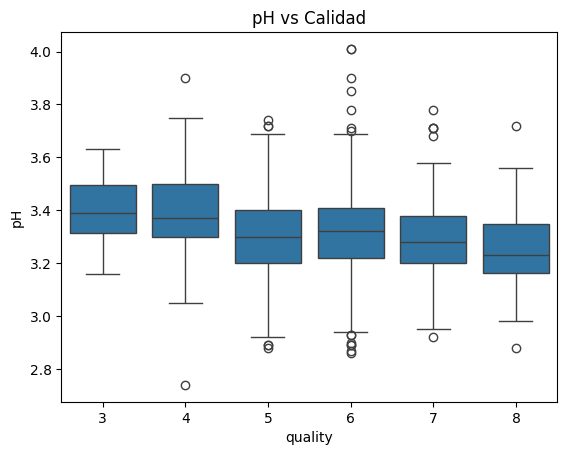

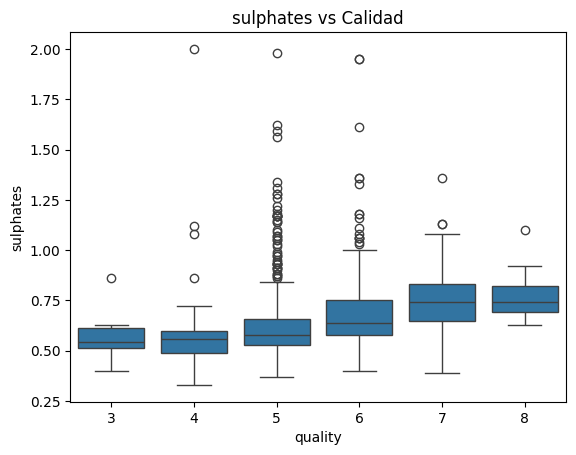

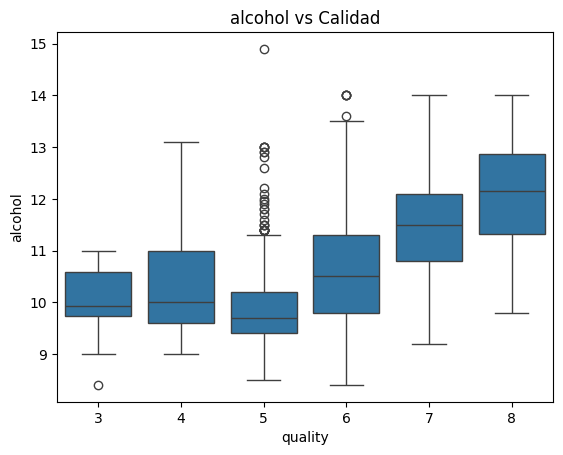

In [ ]:
# Comparación de variables con la calidad
for col in df.columns[:-1]:
  plt.figure()
  sns.boxplot(x='quality', y=col, data=df)
  plt.title(f'{col} vs Calidad')
  plt.show()


# Matriz de correlación

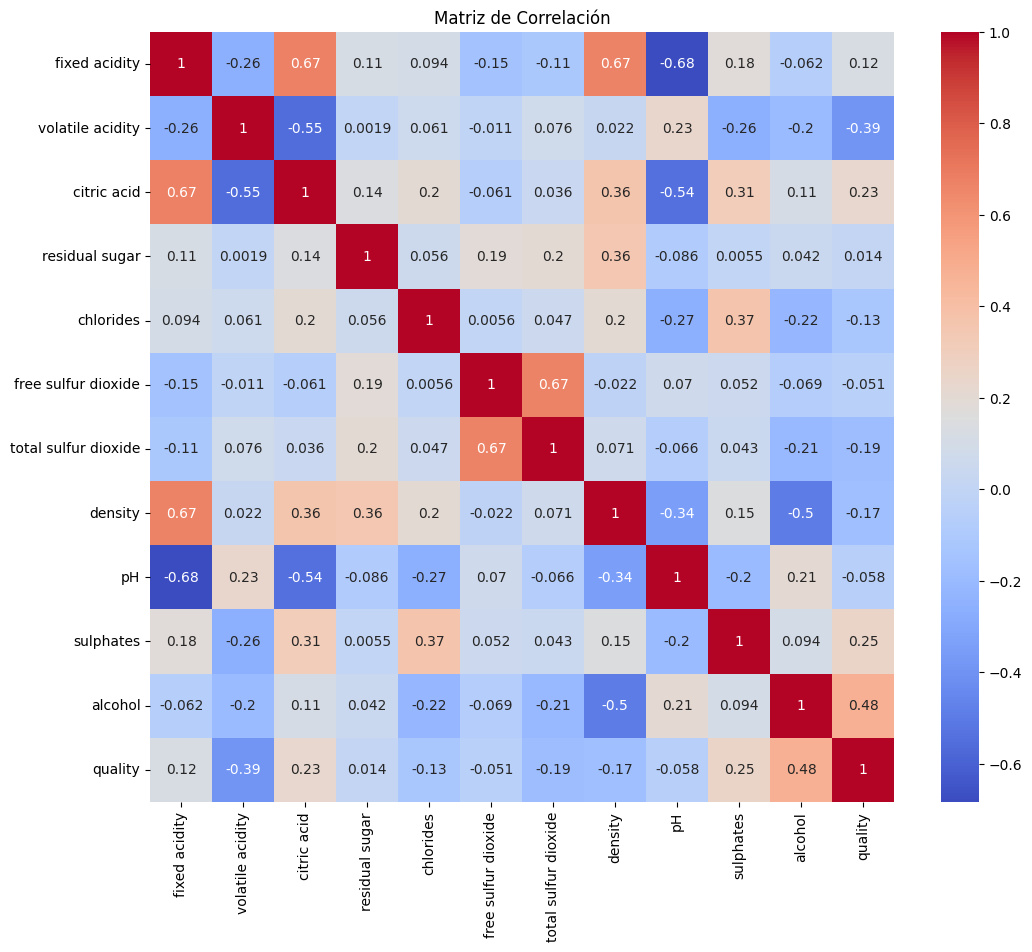

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


# SPIDER CHART

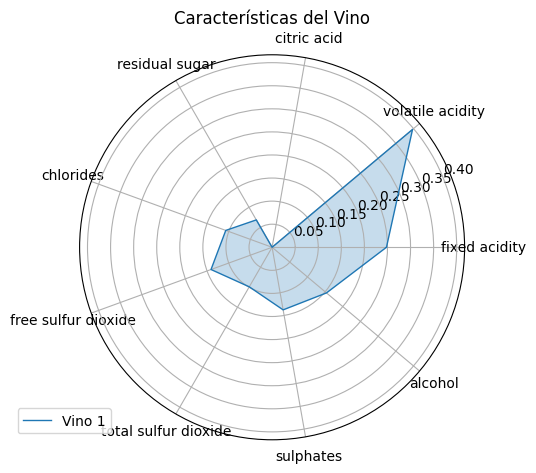

In [31]:
pi = 3.141592653589793

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']

df_norm = (df[features] - df[features].min()) / (df[features].max() - df[features].min())

# Número de variables
categories = list(df_norm.columns)
N = len(categories)

#Angulos del gráfico
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Gráfico
plt.figure(figsize=(5, 5))
ax = plt.subplot(111, polar=True)

# Primer vino (se puede cambiar el índice para visualizar otros vinos)
values = df_norm.iloc[0].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label='Vino 1')
ax.fill(angles, values, alpha=0.25)

# Configuración las etiquetas de los ejes
ax.set_thetagrids(np.degrees(angles[:-1]), labels=categories)

# Leyenda
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Título
plt.title('Características del Vino')
plt.show()